In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('../../Data/features_30_sec.csv', index_col='filename')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, blues.00000.wav to rock.00099.wav
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   1000 non-null   int64  
 1   chroma_stft_mean         1000 non-null   float64
 2   chroma_stft_var          1000 non-null   float64
 3   rms_mean                 1000 non-null   float64
 4   rms_var                  1000 non-null   float64
 5   spectral_centroid_mean   1000 non-null   float64
 6   spectral_centroid_var    1000 non-null   float64
 7   spectral_bandwidth_mean  1000 non-null   float64
 8   spectral_bandwidth_var   1000 non-null   float64
 9   rolloff_mean             1000 non-null   float64
 10  rolloff_var              1000 non-null   float64
 11  zero_crossing_rate_mean  1000 non-null   float64
 12  zero_crossing_rate_var   1000 non-null   float64
 13  harmony_mean             1000 non-null   float64
 14  harmo

In [3]:
df['mfcc1_mean']

filename
blues.00000.wav   -113.570648
blues.00001.wav   -207.501694
blues.00002.wav    -90.722595
blues.00003.wav   -199.544205
blues.00004.wav   -160.337708
                      ...    
rock.00095.wav    -153.640961
rock.00096.wav    -142.392029
rock.00097.wav    -124.952271
rock.00098.wav    -225.007751
rock.00099.wav    -235.161972
Name: mfcc1_mean, Length: 1000, dtype: float64

In [4]:
df.shape

(1000, 59)

In [5]:
img = plt.imread('../../Data/images_original/blues/blues00000.png')

In [6]:
img.shape

(288, 432, 4)

In [7]:
folder_path = '../../Data/genres_original'
files = librosa.util.find_files(folder_path, ext=['wav'], recurse=True)
#files = np.asarray(files)



In [8]:
files[0].split('/')[-1]

'blues.00000.wav'

In [9]:
wavdict = {}
for file in files:
    try:
        sig, sr = librosa.load(file)
        filename = file.split('/')[-1]
        wavdict[filename] = sig
    except:
        continue

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [10]:
len(wavdict)

999

In [11]:
wavdict

{'blues.00000.wav': array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
        -0.06106567, -0.06417847], dtype=float32),
 'blues.00001.wav': array([ 0.00341797,  0.00430298,  0.00137329, ..., -0.11953735,
        -0.17495728, -0.15118408], dtype=float32),
 'blues.00002.wav': array([ 0.01901245,  0.04769897,  0.02941895, ...,  0.01318359,
        -0.0663147 , -0.12484741], dtype=float32),
 'blues.00003.wav': array([-0.01300049, -0.03060913, -0.03607178, ...,  0.0098877 ,
         0.01107788,  0.0118103 ], dtype=float32),
 'blues.00004.wav': array([-0.00631714, -0.00927734, -0.0083313 , ...,  0.04135132,
         0.05197144,  0.05496216], dtype=float32),
 'blues.00005.wav': array([-0.02429199, -0.02975464, -0.00961304, ...,  0.13458252,
         0.0619812 , -0.00091553], dtype=float32),
 'blues.00006.wav': array([ 0.1822815 ,  0.28302002,  0.21020508, ..., -0.22045898,
        -0.36273193, -0.4295349 ], dtype=float32),
 'blues.00007.wav': array([ 0.01290894,  0.00811768, -0

In [12]:
mfcc_dict = {}
for key, value in wavdict.items():
    mfcc_dict[key] = librosa.feature.mfcc(y=value, sr=sr)

In [13]:
list(mfcc_dict.values())[0].shape

(20, 1293)

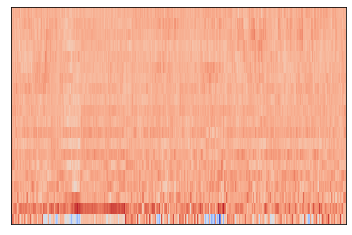

In [28]:
librosa.display.specshow(list(mfcc_dict.values())[750])

In [31]:
pd.DataFrame(list(mfcc_dict.values())[750]).T.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,-14.141163,44.353634,12.703158,10.149204,11.267976,3.966174,12.502354,-2.167507,10.717336,2.297139,5.046891,-0.865355,3.805714,1.671665,1.506381,-0.188375,-1.018323,4.785520,4.859632,3.051872
std,55.325748,26.815886,18.356800,16.377045,13.104127,13.583802,11.033608,10.007022,9.712111,8.561964,7.733657,7.518273,8.941125,9.470532,9.756854,8.868741,9.946766,9.542727,9.742558,8.134544
min,-261.317261,-48.253418,-38.795036,-52.922813,-25.880219,-41.026924,-20.105930,-48.317455,-32.744099,-33.394363,-23.087793,-27.753887,-26.136852,-23.131645,-26.062134,-26.018398,-36.207481,-23.958054,-24.968159,-26.336977
25%,-40.459454,25.187778,1.399092,1.563450,2.947091,-4.112135,5.148604,-8.049568,4.787088,-2.697528,-0.110829,-5.426993,-2.294544,-5.287022,-4.856339,-5.269730,-7.283362,-1.365944,-1.316524,-2.555377
50%,-5.574996,45.583614,10.927566,10.723561,10.602961,4.847314,12.468073,-1.496405,11.564548,3.147584,5.298098,-0.134399,3.823386,0.737331,0.843143,-0.545014,-1.513699,3.846371,4.064737,2.383064
75%,20.686596,62.871254,22.974266,21.673813,20.090981,13.653041,20.031078,4.598235,17.705086,8.204739,10.692596,4.156750,9.769306,7.457909,7.096033,4.602540,4.443226,9.574964,10.859004,8.482380
max,115.753395,122.345734,71.155899,48.372009,49.547356,48.013489,44.193428,25.399561,33.006241,24.322399,26.987516,21.058865,29.620892,38.168251,34.468365,42.787491,38.095524,48.847534,38.884979,28.922964


In [198]:
mfcc_dict_scaled = {}
for key,value in mfcc_dict.items():
    mfcc_dict_scaled[key] = scale(value, axis=1)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/p

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/p

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-pac

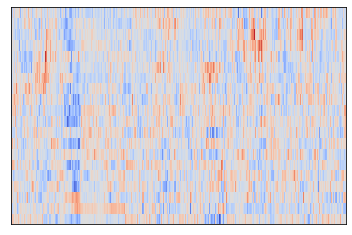

In [25]:
librosa.display.specshow(list(mfcc_dict_scaled.values())[750])

In [35]:
pd.DataFrame(list(mfcc_dict_scaled.values())[750])

,0,1,2,3,4,5,6,7,8,9,...,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292
0,-0.842956,-0.359577,0.017398,-0.525615,-1.590621,-2.038344,-0.361563,1.059637,1.448954,1.505079,...,-0.507667,-0.258533,0.077568,0.259535,0.306652,0.368216,0.409947,0.273481,0.220680,0.056016
1,0.362559,0.980095,1.565160,1.435903,0.512462,0.725472,-0.104991,-0.976831,-1.084394,-0.774235,...,0.520555,0.028830,-0.621839,-1.194123,-1.520823,-1.765287,-2.040104,-2.053972,-1.745805,-1.711356
2,0.237799,0.091311,-0.210413,-0.072216,0.356244,0.799584,1.802344,1.739734,0.806373,0.257254,...,-1.766219,-0.844173,-0.066617,0.559743,1.053544,1.271418,1.401851,1.885275,1.768933,1.478706
3,0.708834,0.993995,1.428698,1.603087,1.546838,1.245030,1.052767,1.066739,0.736923,0.408182,...,0.920584,-0.248626,-0.836097,-0.923379,-0.931233,-0.763395,-0.577703,-0.585014,-0.601769,-0.338560
4,-0.338606,-0.162636,0.488951,0.581352,-0.096608,-0.570165,-0.641634,-0.429599,-0.128630,-0.889126,...,1.636483,2.052888,2.193985,1.967460,1.702351,1.437314,1.436570,0.680179,0.386338,0.730837
5,-0.618792,-0.431604,-0.047918,0.055589,0.256272,-0.249520,0.740721,1.388136,1.925938,1.593644,...,-1.008330,-1.049066,-1.523157,-1.329023,-1.020234,-0.454491,-0.109928,-0.856180,-0.816773,-0.945245
6,0.522459,0.283965,-0.583361,-1.155459,-0.339519,-0.729388,-0.305681,0.421897,0.476819,-0.405511,...,-0.295950,0.265826,0.060135,0.063653,-0.411292,-1.369264,-1.735027,-2.019143,-1.280536,-0.652518
7,1.277181,0.992172,-0.174612,-0.828301,0.082016,0.074692,1.028877,1.751803,1.811169,1.170705,...,0.115808,0.603458,0.398346,0.635241,0.534431,0.296141,0.734003,0.944358,0.658453,0.582890
8,1.058381,0.136265,-0.228381,-0.119107,0.220061,0.174509,-0.056666,-0.670194,-0.754272,-0.510266,...,-1.523955,-1.164009,-1.169785,-1.016350,-0.428586,-0.103507,0.043057,0.583500,1.550952,1.646447
9,0.730729,-0.017068,-0.378723,-0.057621,0.326767,0.444030,-0.022113,-0.110993,-0.090259,0.705235,...,0.096924,0.658203,1.000574,0.739513,0.728929,0.200521,0.009739,-0.037979,1.059553,1.799673


In [36]:
genres = [key.split('.')[0] for key in list(mfcc_dict_scaled.keys())]
genrescode = {}
i = 0
for genre in genres:
    if genre in genrescode.keys():
        continue
    else:
        genrescode[genre] = i
        i += 1
genrescode

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [220]:
mdsv = tuple(mfcc_dict_scaled.values())
# mdsv[0].shape
X = np.dstack(mdsv)
X
# X = 

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1293 and the array at index 142 has size 1308

In [201]:
X = mfcc_dict_scaled.values()]
X

TypeError: 'builtin_function_or_method' object is not subscriptable

In [197]:
y = np.array(mfcc_dict.keys())
X = pd.DataFrame({'X':[*mfcc_dict_scaled.values()]})
y = y.split('.')[0]
y = y.map(genrescode)

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [192]:
# train test split
X_trainpre, X_holdout, y_trainpre, y_holdout = train_test_split(mfcc_df[['X']], mfcc_df['y'],
                                                                test_size=0.1,
                                                                stratify=y['y'].values,
                                                                random_state=42069)
X_train, X_test, y_train, y_test = train_test_split(X_trainpre, y_trainpre, test_size=0.17,
                                                    stratify=y_trainpre.values,
                                                    random_state=42069)

In [193]:
X_train.loc[411]

X    ((tf.Tensor(-1.5308788, shape=(), dtype=float3...
Name: 411, dtype: object

In [173]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import convert_to_tensor

In [153]:
def visualize_training_results(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()

In [158]:
X_train.iloc[0][0].shape

(20, 1293)

In [162]:
# simple model
simple = keras.Sequential(
    [
        keras.Input(shape=((20, 1293))),
        layers.Flatten(),
        layers.Dense(64, activation='tanh'),
        layers.Dense(10, activation='softmax')
])
simple.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 25860)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1655104   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 1,655,754
Trainable params: 1,655,754
Non-trainable params: 0
_________________________________________________________________


In [165]:
batch = int(X_train.shape[0]/20)
epochs = 15

# Compiling our model
simple.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [195]:
simple_history = simple.fit(X_train, 
                    y_train, 
                    batch_size=batch,
                    epochs=epochs, 
                    validation_data=(X_test, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type tensorflow.python.framework.ops.EagerTensor).